In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel('finalVeriSeti.xlsx', index_col=0)

In [11]:
df

,Category (Tanı),Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category (Tanı)  615 non-null    object 
 1   Age              615 non-null    int64  
 2   Sex              615 non-null    object 
 3   ALB              614 non-null    float64
 4   ALP              597 non-null    float64
 5   ALT              614 non-null    float64
 6   AST              615 non-null    float64
 7   BIL              615 non-null    float64
 8   CHE              615 non-null    float64
 9   CHOL             605 non-null    float64
 10  CREA             615 non-null    float64
 11  GGT              615 non-null    float64
 12  PROT             614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


### Hipotez testlerini uygulayabilmek için NaN değerleri düşüyoruz.

In [13]:
df = df.dropna()

In [14]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category (Tanı)  589 non-null    object 
 1   Age              589 non-null    int64  
 2   Sex              589 non-null    object 
 3   ALB              589 non-null    float64
 4   ALP              589 non-null    float64
 5   ALT              589 non-null    float64
 6   AST              589 non-null    float64
 7   BIL              589 non-null    float64
 8   CHE              589 non-null    float64
 9   CHOL             589 non-null    float64
 10  CREA             589 non-null    float64
 11  GGT              589 non-null    float64
 12  PROT             589 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 59.9+ KB


In [8]:
df['Category (Tanı)'].value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category (Tanı), dtype: int64

# Soru 1: Bağımlı değişkenin aldığı değerlere göre (tanı kategorileri) bağımsız değişkenlerin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık var mıdır? Hipotez testleri ile test ediniz.

### Bağımsız değişkenlerimiz'e 4.soruda normallik testi uyguladık değişkenlerimiz normal dağılıma uymuyorlar ve bu değişkenlerimiz numerical, bağımlı değişkenimiz ise categorical, bu sebeple Kruskall-Wallis testi uygulayacağız. Sadece Sex değişkeni için chi square uygulayacağız (2 categorical).

### Uyguladığımız ilk testte H0 reject, yani alternatif hipotez kabul çıkması durumunda 2. aşama testi (Kruskal-Wallis sonrası post hoc testleri) uygulayacağız. Dunn testi ile tanı içindeki grupları bağımsız değişken karşısında istatistiki olarak anlamlı olup olmadığını test edeceğiz (Tanı içindeki gruplar incelenecek).

In [9]:
from scipy import stats

In [10]:
from ipywidgets import interact
@interact
def kruskal(col=df.columns.tolist()):
    k, v = list(zip(*df.groupby('Category (Tanı)')[col].groups.items()))
    print(stats.kruskal(*[df[col][v[i]].dropna() for i in range(len(v))]))

interactive(children=(Dropdown(description='col', options=('Category (Tanı)', 'Age', 'Sex', 'ALB', 'ALP', 'ALT…

## AGE

In [11]:
k, v = list(zip(*df.groupby('Category (Tanı)')['Age'].groups.items()))
stat, p = stats.kruskal(*[df['Age'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=24.8476, p=0.0001
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen 0 ile 3, 0s ile 1, 1 ile 3 grupları ile Age değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demektir.)

In [12]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['Age'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,False,False,False,True
0s=suspect Blood Donor,False,False,True,False,False
1=Hepatitis,False,True,False,False,True
2=Fibrosis,False,False,False,False,False
3=Cirrhosis,True,False,True,False,False


In [13]:
k, v = list(zip(*df.groupby('Category (Tanı)')['ALB'].groups.items()))
stat, p = stats.kruskal(*[df['ALB'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=67.0175, p=0.0000
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile ALB değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [14]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['ALB'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,True,False,False,True
0s=suspect Blood Donor,True,False,True,True,False
1=Hepatitis,False,True,False,False,True
2=Fibrosis,False,True,False,False,True
3=Cirrhosis,True,False,True,True,False


## ALP

In [15]:
k, v = list(zip(*df.groupby('Category (Tanı)')['ALP'].groups.items()))
stat, p = stats.kruskal(*[df['ALP'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=66.0550, p=0.0000
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile ALP değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [16]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['ALP'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,False,True,True,False
0s=suspect Blood Donor,False,False,True,True,False
1=Hepatitis,True,True,False,False,True
2=Fibrosis,True,True,False,False,True
3=Cirrhosis,False,False,True,True,False


## ALT

In [17]:
k, v = list(zip(*df.groupby('Category (Tanı)')['ALT'].groups.items()))
stat, p = stats.kruskal(*[df['ALT'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=60.3050, p=0.0000
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile ALT değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [18]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['ALT'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,False,False,False,True
0s=suspect Blood Donor,False,False,False,True,True
1=Hepatitis,False,False,False,False,False
2=Fibrosis,False,True,False,False,False
3=Cirrhosis,True,True,False,False,False


## AST

In [19]:
k, v = list(zip(*df.groupby('Category (Tanı)')['AST'].groups.items()))
stat, p = stats.kruskal(*[df['AST'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=121.5432, p=0.0000
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile AST değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [20]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['AST'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,False,True,True,True
0s=suspect Blood Donor,False,False,False,False,False
1=Hepatitis,True,False,False,False,False
2=Fibrosis,True,False,False,False,False
3=Cirrhosis,True,False,False,False,False


## BIL

In [21]:
k, v = list(zip(*df.groupby('Category (Tanı)')['BIL'].groups.items()))
stat, p = stats.kruskal(*[df['BIL'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=78.3784, p=0.0000
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile BIL değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [22]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['BIL'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,False,True,True,True
0s=suspect Blood Donor,False,False,True,True,True
1=Hepatitis,True,True,False,False,False
2=Fibrosis,True,True,False,False,False
3=Cirrhosis,True,True,False,False,False


## CHE

In [23]:
k, v = list(zip(*df.groupby('Category (Tanı)')['CHE'].groups.items()))
stat, p = stats.kruskal(*[df['CHE'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=63.0767, p=0.0000
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile CHE değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [24]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['CHE'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,False,False,False,True
0s=suspect Blood Donor,False,False,False,False,False
1=Hepatitis,False,False,False,False,True
2=Fibrosis,False,False,False,False,True
3=Cirrhosis,True,False,True,True,False


## CHOL

In [25]:
k, v = list(zip(*df.groupby('Category (Tanı)')['CHOL'].groups.items()))
stat, p = stats.kruskal(*[df['CHOL'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=50.8028, p=0.0000
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile CHOL değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [26]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['CHOL'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,False,False,False,True
0s=suspect Blood Donor,False,False,False,False,False
1=Hepatitis,False,False,False,False,True
2=Fibrosis,False,False,False,False,False
3=Cirrhosis,True,False,True,False,False


## CREA

In [27]:
k, v = list(zip(*df.groupby('Category (Tanı)')['CREA'].groups.items()))
stat, p = stats.kruskal(*[df['CREA'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=17.1030, p=0.0018
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile CREA değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [28]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['CREA'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,False,False,False,False
0s=suspect Blood Donor,False,False,False,False,False
1=Hepatitis,False,False,False,False,False
2=Fibrosis,False,False,False,False,False
3=Cirrhosis,False,False,False,False,False


## GGT

In [29]:
k, v = list(zip(*df.groupby('Category (Tanı)')['GGT'].groups.items()))
stat, p = stats.kruskal(*[df['GGT'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=83.5637, p=0.0000
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile GGT değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [30]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['GGT'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,True,True,True,True
0s=suspect Blood Donor,True,False,False,False,False
1=Hepatitis,True,False,False,False,False
2=Fibrosis,True,False,False,False,False
3=Cirrhosis,True,False,False,False,False


## PROT

In [31]:
k, v = list(zip(*df.groupby('Category (Tanı)')['PROT'].groups.items()))
stat, p = stats.kruskal(*[df['PROT'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=21.3252, p=0.0003
İstatiksel olarak anlamlı bir farklılık vardır (reject H0)


### Kruskal-Wallis testi sonucunda H0 reject çıktı, ikinci aşama dunn testini yapıyoruz.

### True olarak dönen gruplar ile PROT değişkeninin her birinin aldığı değerler arasında istatistiksel olarak anlamlı bir farklılık vardır. (True = H0 reject demek)

In [32]:
import scikit_posthocs as sp
pd.DataFrame(sp.posthoc_dunn([df['PROT'][v[i]].tolist() for i in range(len(v))]).values, index=k, columns=k) < 0.005

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0=Blood Donor,False,True,False,False,False
0s=suspect Blood Donor,True,False,True,True,False
1=Hepatitis,False,True,False,False,False
2=Fibrosis,False,True,False,False,False
3=Cirrhosis,False,False,False,False,False


## Sex sütunu categorical olduğu için 2 categorical değeri test etmek için Chi Square testini uygluyoruz.

In [33]:
g, p, dof, expctd = stats.chi2_contingency(pd.crosstab(df['Category (Tanı)'], df['Sex']))
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=21.3252, p=0.2513
İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)


### Fail to reject H0 çıktığı için 2. aşama teste gerek yoktur.

# Soru 2: Bağımsız değişkenleri kullanarak Temel Bileşenler analizi yapınız ve toplam varyansın en az %90’nını açıklayan temel bileşen sayısını belirtiniz.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category (Tanı)  589 non-null    object 
 1   Age              589 non-null    int64  
 2   Sex              589 non-null    object 
 3   ALB              589 non-null    float64
 4   ALP              589 non-null    float64
 5   ALT              589 non-null    float64
 6   AST              589 non-null    float64
 7   BIL              589 non-null    float64
 8   CHE              589 non-null    float64
 9   CHOL             589 non-null    float64
 10  CREA             589 non-null    float64
 11  GGT              589 non-null    float64
 12  PROT             589 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 59.9+ KB


### Bağımsız değişkenlerimizi X'e atıyoruz ve categorical olan Sex sütunu dolayısıyla get_dummies uygulayarak numerical'a dönüştürüyoruz.

In [23]:
X = df.drop('Category (Tanı)', axis = 1)
y = df['Category (Tanı)']

In [24]:
X = pd.get_dummies(X, drop_first=True)

In [25]:
from sklearn.decomposition import PCA

In [26]:
model = PCA()

In [27]:
model_fit = model.fit_transform(X)

### X (bağımsız değişkenlerimiz) üzerine Sklearn kütüphanesinden PCA (Principal Component Analysis) algoritmasını uyguluyoruz. Grafik üzerine kümülatif olarak variance toplamını bileşen sayısını gösterecek şekilde plotluyoruz.

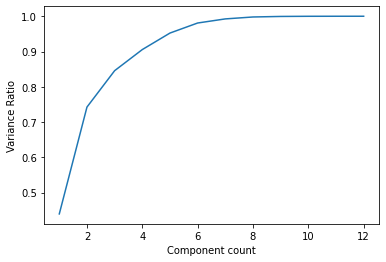

In [28]:
x = range(1,13)
plt.plot(x,np.cumsum(model.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [29]:
np.cumsum(model.explained_variance_ratio_)  # Kümülatif variance toplamı

array([0.43937555, 0.74238245, 0.84559832, 0.90549819, 0.95231942,
       0.98081275, 0.99244563, 0.99791549, 0.99942932, 0.99986662,
       0.99997588, 1.        ])

### Grafikten ve kümülatif variance toplamından görüldüğü üzere 4 temel bileşen toplam varyansın  en az % 90'ını açıklamaktadır.

# Soru 3: Cinsiyete göre CHOL değişkeninin değerleri arasında istatistiksel olarak anlamlı bir farklılık var mıdır? Sorusuna cevap bulmak için hangi hipotez testini kullanırsınız? Neden? Hipotez testini gerçekleştirip bulduğunuz sonucu yorumlayınız.

###  Bu iki değişkenin değerleri arasında istatistiksel olarak anlamlı bir farklılık olup olmadığını test etmek için, Kruskal-Wallis hipotez testini kullanırız. 

### Çünkü CHOL değişkeni sayısal, Sex değişkeni ise categorical ve iki değişkende parametrik değildir.

In [42]:
k, v = list(zip(*df.groupby('Sex')['CHOL'].groups.items()))
stat, p = stats.kruskal(*[df['CHOL'][v[i]] for i in range(len(v))])
print('Statistics=%.4f, p=%.4f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)')
else:
    print('İstatiksel olarak anlamlı bir farklılık vardır (reject H0)')

Statistics=0.6927, p=0.4053
İstatistiksel olarak anlamlı bir farklılık yoktur (fail to reject H0)


### Bu iki değişkenin değerleri arasında 0.05 anlamlılık düzeyinde istatiksel olarak anlamlı bir farklılık yoktur. Cinsiyete göre CHOL değişkeninin değerleri arasında istatiksel olarak anlamlı bir fark bulunmamıştır. 

# Soru 4: Bağımsız değişkenlerden hangileri normal dağılıma sahip bir ana kitleden gelmektedir? Normallik testler ile test ediniz?

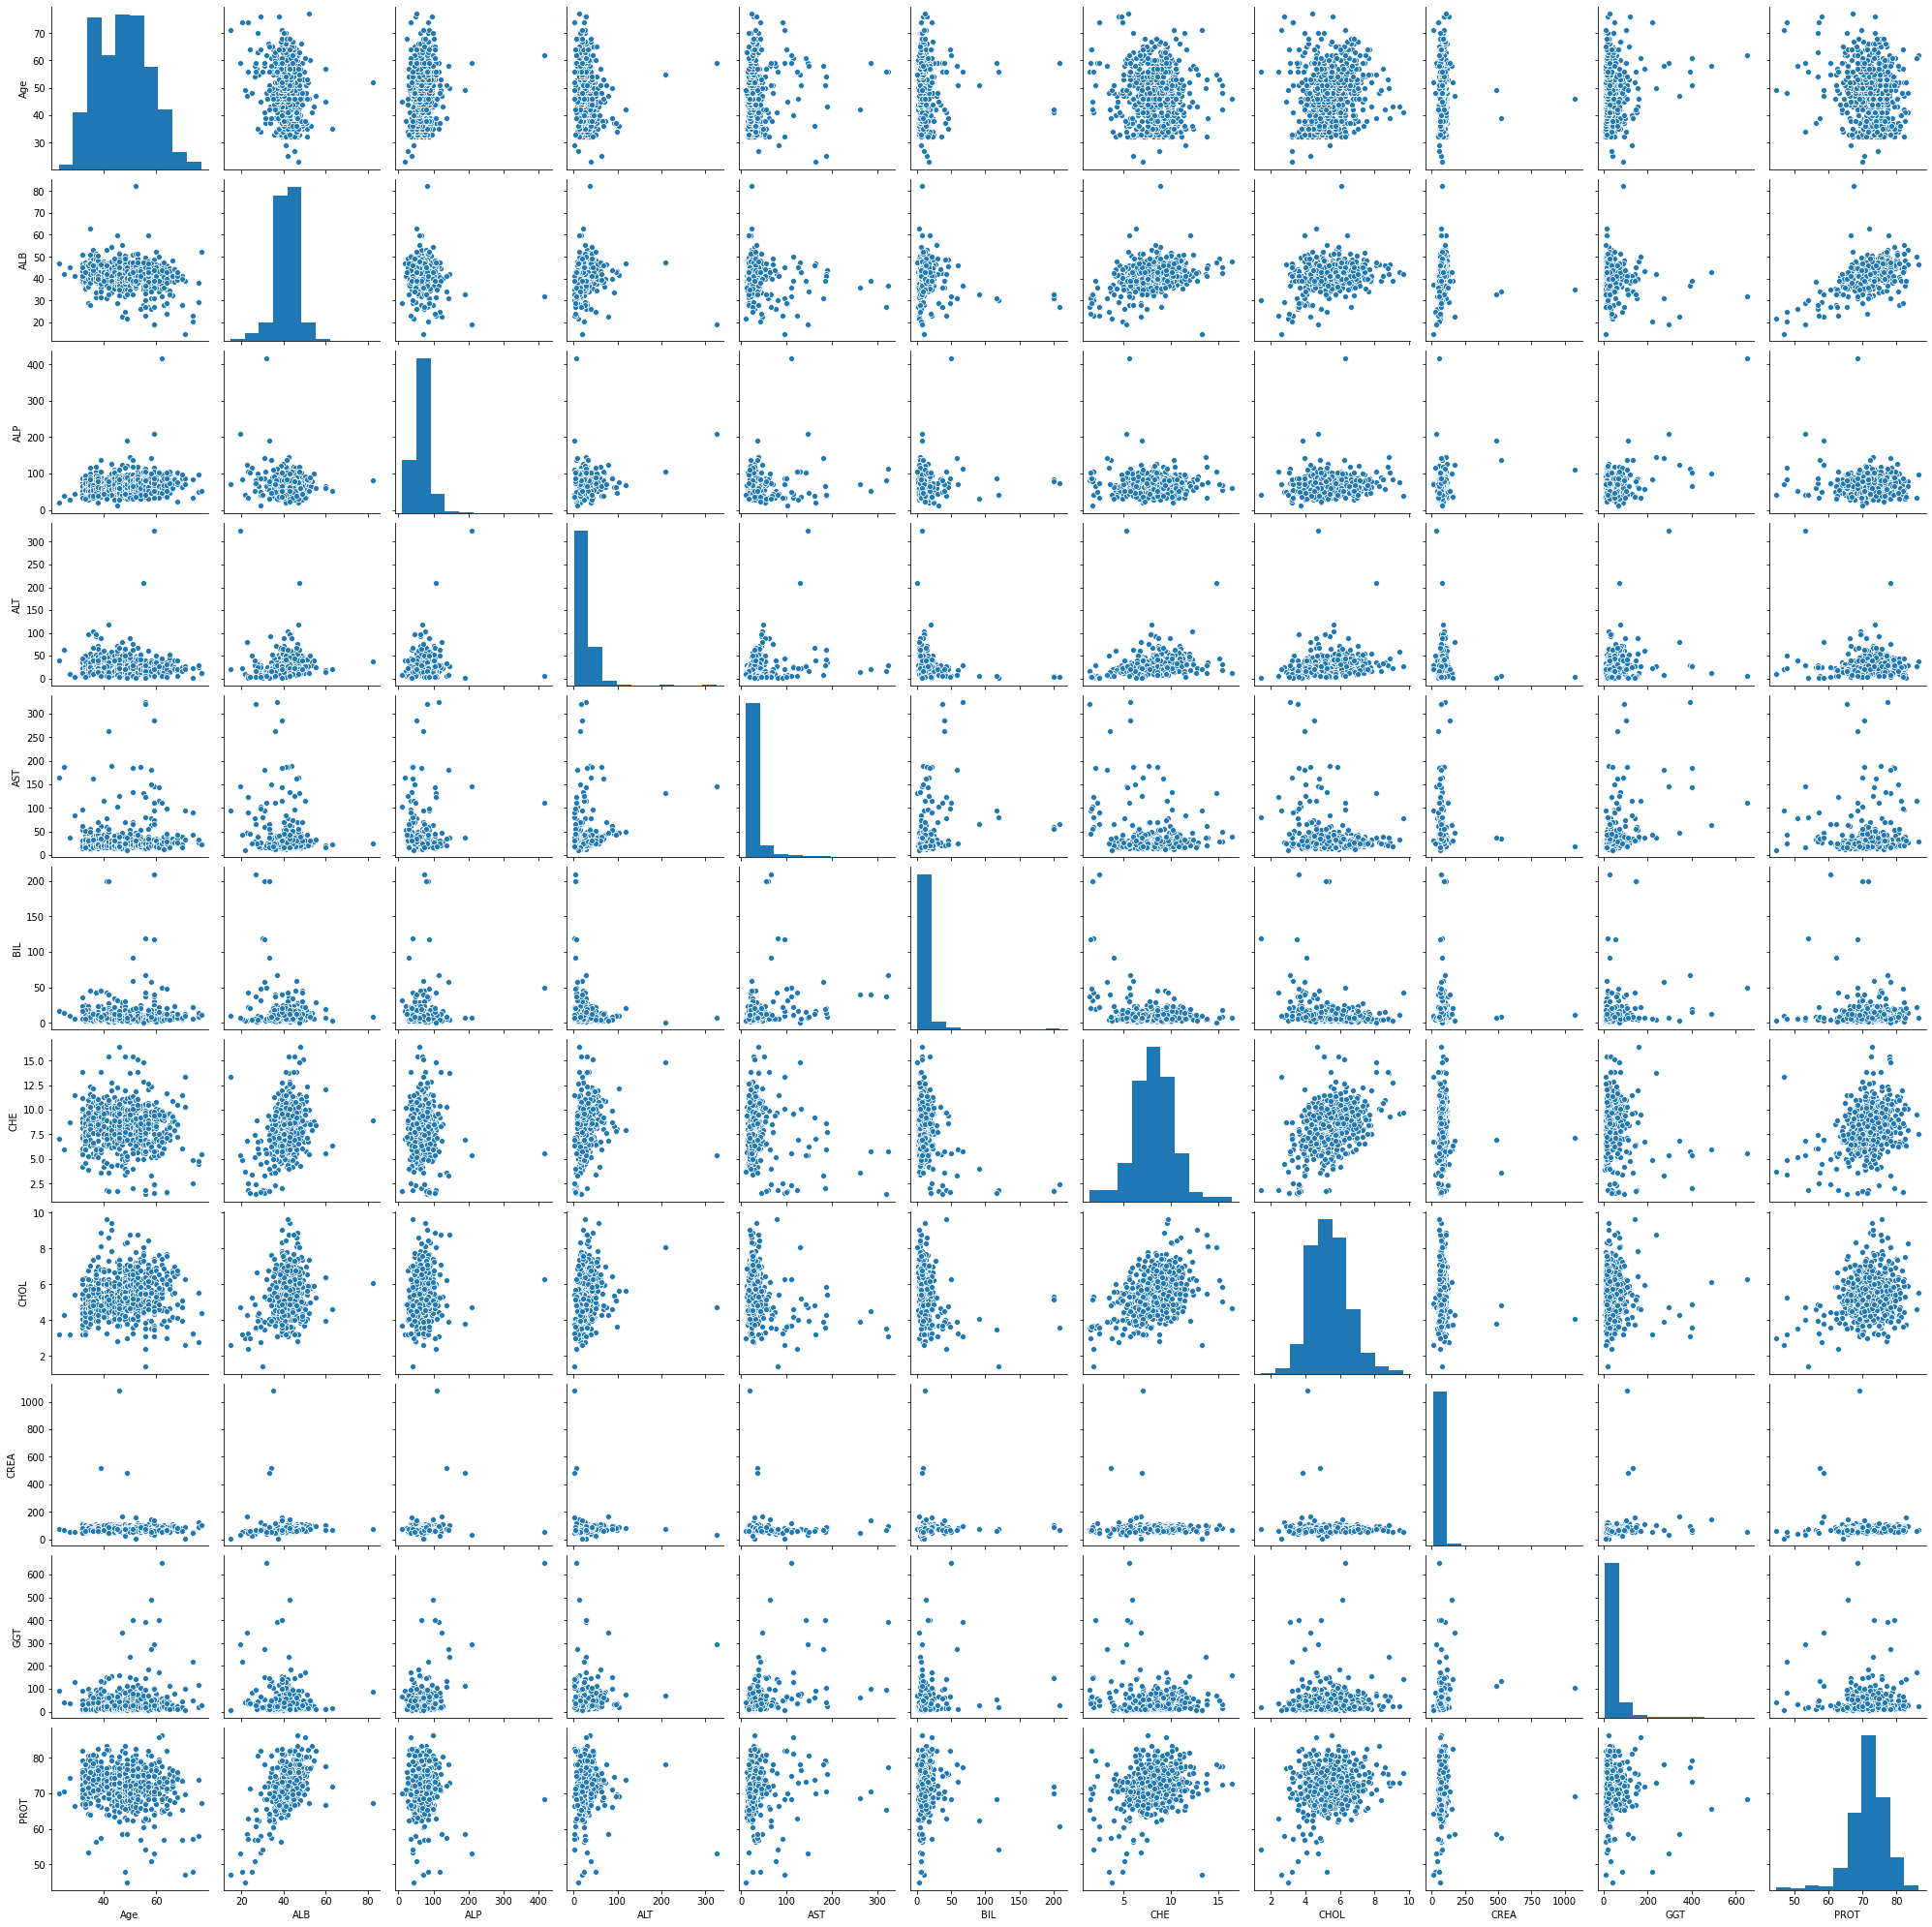

In [43]:
sns.pairplot(df)

### Pairplot diagonalında görüldüğü üzere, histogramlardan hiç bir değişkenin dağılımı normal dağılıma uymuyor.

## Her değişkene hem Shapiro-Wilk hem de Anderson-Darling normallik testlerini uyguluyoruz.

In [44]:
from scipy.stats import shapiro, anderson

### Testleri numpy ile ürettiğimiz normal dağılımlı bir veride kullanıyoruz ve gaussian olarak doğruladığını görüyoruz.

In [45]:
(np.random.randn(1, 5))

array([[ 0.42908445, -0.36732462, -1.30214807,  1.46625365, -0.44963745]])

In [46]:
stat, p = shapiro((np.random.randn(1, 5)))
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.857, p=0.216
Data Gaussian (fail to reject H0)


In [91]:
stat, crt, sig_lvl = anderson((np.random.randn(1, 5)), dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian (reject H0)


## AGE

In [48]:
stat, p = shapiro(df['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.981, p=0.000
Data Gaussian değil (reject H0)


In [49]:
stat, crt, sig_lvl = anderson(df['Age'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## ALB

In [50]:
stat, p = shapiro(df['ALB'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.929, p=0.000
Data Gaussian değil (reject H0)


In [51]:
stat, crt, sig_lvl = anderson(df['ALB'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## ALP

In [52]:
stat, p = shapiro(df['ALP'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.763, p=0.000
Data Gaussian değil (reject H0)


In [53]:
stat, crt, sig_lvl = anderson(df['ALP'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## ALT

In [54]:
stat, p = shapiro(df['ALT'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.598, p=0.000
Data Gaussian değil (reject H0)


In [55]:
stat, crt, sig_lvl = anderson(df['ALT'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## AST

In [56]:
stat, p = shapiro(df['AST'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.435, p=0.000
Data Gaussian değil (reject H0)


In [57]:
stat, crt, sig_lvl = anderson(df['AST'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## BIL

In [58]:
stat, p = shapiro(df['BIL'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.343, p=0.000
Data Gaussian değil (reject H0)


In [59]:
stat, crt, sig_lvl = anderson(df['BIL'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## CHE

In [60]:
stat, p = shapiro(df['CHE'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.981, p=0.000
Data Gaussian değil (reject H0)


In [61]:
stat, crt, sig_lvl = anderson(df['CHE'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## CHOL

In [62]:
stat, p = shapiro(df['CHOL'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.989, p=0.000
Data Gaussian değil (reject H0)


In [63]:
stat, crt, sig_lvl = anderson(df['CHOL'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## CREA

In [64]:
stat, p = shapiro(df['CREA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.243, p=0.000
Data Gaussian değil (reject H0)


In [65]:
stat, crt, sig_lvl = anderson(df['CREA'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## GGT

In [66]:
stat, p = shapiro(df['GGT'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.456, p=0.000
Data Gaussian değil (reject H0)


In [67]:
stat, crt, sig_lvl = anderson(df['GGT'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## PROT

In [68]:
stat, p = shapiro(df['PROT'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.941, p=0.000
Data Gaussian değil (reject H0)


In [69]:
stat, crt, sig_lvl = anderson(df['PROT'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## Elimizdeki categorical olan değişkeni de numericala çevirip normallik testi uyguluyoruz.

In [70]:
df['Sex'] = df['Sex'].map({'m': 0, 'f' : 1})

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
stat, p = shapiro(df['Sex'])
print('Statistics=%.4f, 4=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data Gaussian (fail to reject H0)')
else:
    print('Data Gaussian değil (reject H0)')

Statistics=0.6166, 4=0.000
Data Gaussian değil (reject H0)


In [72]:
stat, crt, sig_lvl = anderson(df['Sex'], dist = 'norm')
alpha = 0.05
if crt[2] > alpha:
    print('Data Gaussian değil (fail to reject H0)')
else:
    print('Data Gaussian (reject H0)')

Data Gaussian değil (fail to reject H0)


## Uyguladığımız testler sonucunda normal dağılıma sahip bir değişkenimiz bulunmamaktadır.

# Soru 5: Bağımsız değişkenler üzerinden faktör analizi gerçekleştirerek değişkelerin kendi içinde farklı faktörlere ayrılıp ayrılmadığını belirleyiniz ?

In [74]:
from factor_analyzer import FactorAnalyzer

In [75]:
df.head()

,Category (Tanı),Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category (Tanı)  589 non-null    object 
 1   Age              589 non-null    int64  
 2   Sex              589 non-null    int64  
 3   ALB              589 non-null    float64
 4   ALP              589 non-null    float64
 5   ALT              589 non-null    float64
 6   AST              589 non-null    float64
 7   BIL              589 non-null    float64
 8   CHE              589 non-null    float64
 9   CHOL             589 non-null    float64
 10  CREA             589 non-null    float64
 11  GGT              589 non-null    float64
 12  PROT             589 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 59.9+ KB


### Faktör analizine sokmak için bağımlı değişkenimizi ayırıyoruz.

In [77]:
X = df.drop(["Category (Tanı)"], axis=1)

In [78]:
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Faktör analizi öncesi verimizin faktör analizine uygunluğunu kontrol ediyoruz.

### Kaiser-Meyer-Olkin (KMO) Testi ile verilerin faktör analizine uygunluğunu öölçüyoruz. 1'e yakın olması faktör analizine uygun olduğunu gösteriyor. 0.50'den büyük olması faktör analizi için uygun olmasına yeterlidir.

In [79]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

0.6017817425371268

### Bartlett ’s test ile korelasyon matrisinin birim matris olmadığını görüyoruz.

In [80]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(X)

chi_square_value, p_value

(1296.8872595028702, 4.397636529127193e-228)

### Heatmap ile korelasyonları inceliyoruz; yüksek koreleli değişken olmadığı görüldü.

<AxesSubplot:>

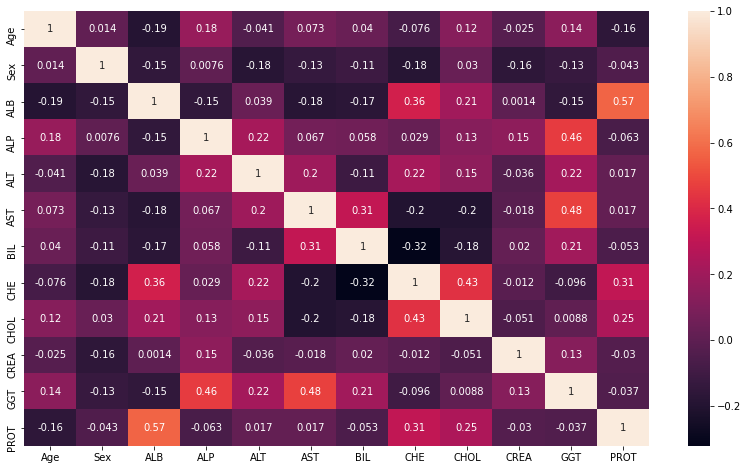

In [82]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)

### Verimiz normal dağılmamış durumda ve verimizde outlierlar mevcut. Faktör analizimizi bu şartlar altında gerçekliyoruz. Faktör analizinin neticesinde alacağımız sonuçlara bu varsayımları karşılamadığını bilerek yaklaşmamız gerekiyor.

### Faktör sayısını seçiyoruz.

In [85]:
from factor_analyzer import FactorAnalyzer

factor = FactorAnalyzer(rotation=None, n_factors=5)
factor.fit(X)
factor.loadings_

array([[-0.19283132,  0.05789472,  0.20200441,  0.09937588,  0.07407547],
       [-0.02694102, -0.31286486,  0.09839112,  0.47151454,  0.3035596 ],
       [ 0.61467457,  0.20775641, -0.21589383, -0.01496677, -0.12417489],
       [-0.25323847,  0.45669835,  0.47796258,  0.26690901, -0.17749446],
       [ 0.01231255,  0.4038483 ,  0.1642416 , -0.20355847,  0.15095755],
       [-0.55780923,  0.51362763, -0.45211281, -0.10539943,  0.3137919 ],
       [-0.38138149,  0.07516562, -0.24866249,  0.06671011, -0.15371479],
       [ 0.61115319,  0.33190282,  0.25220899, -0.25086348,  0.14249981],
       [ 0.39370571,  0.25311212,  0.30880458,  0.101404  ,  0.17530875],
       [-0.06713246,  0.10280943,  0.06517465, -0.05757096, -0.33345385],
       [-0.44401439,  0.5870906 ,  0.09296048,  0.10176744, -0.07149883],
       [ 0.62548945,  0.425219  , -0.45367518,  0.37175167, -0.06690278]])

### Özdeğerleri kontrol ederek, 1'in üstünde 5 adet değişkenin/faktörün olduğunu görüyoruz.

In [86]:
ei, a = factor.get_eigenvalues()
ei

array([2.45514653, 1.93211109, 1.41967553, 1.12029216, 1.04613809,
       0.93326994, 0.71868957, 0.62718526, 0.56809765, 0.46739583,
       0.39457051, 0.31742785])

### Grafik üzerinde de özdeğerleri kontrol ediyoruz.

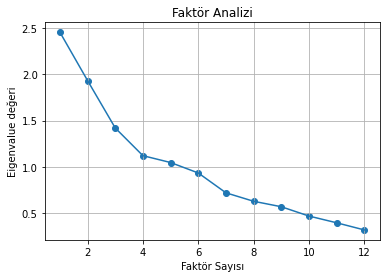

In [88]:
plt.scatter(range(1,X.shape[1]+1),ei)
plt.plot(range(1,X.shape[1]+1),ei)
plt.title('Faktör Analizi')
plt.xlabel('Faktör Sayısı')
plt.ylabel('Eigenvalue değeri')
plt.grid()
plt.show()

### Faktör analizimizi gerçekleştiriyoruz. Her bir değişkeni temsil edecek faktörü mutlak olarak en büyük olan değeri görebiliriz.

In [89]:
factor = FactorAnalyzer(rotation="varimax", n_factors=5)
factor.fit(X)
factor.loadings_

array([[-0.16554227,  0.00728386,  0.03799567,  0.24381758, -0.09141257],
       [-0.04907899, -0.10572675, -0.19962041,  0.08846334, -0.60125243],
       [ 0.57716883,  0.27725538, -0.09279711, -0.20514562,  0.15016881],
       [-0.05494662,  0.09515158,  0.02781935,  0.75958527,  0.11865658],
       [-0.03433836,  0.3566217 ,  0.28900527,  0.15651465,  0.13440811],
       [-0.01248098, -0.23054483,  0.90911088,  0.09551302, -0.00573068],
       [-0.01100394, -0.41191956,  0.22466852,  0.10191578,  0.10174301],
       [ 0.23080098,  0.74390106, -0.03528634, -0.06344189,  0.13633735],
       [ 0.18777976,  0.51510242, -0.08992256,  0.18079357, -0.1186676 ],
       [ 0.01355304, -0.08442712, -0.07636749,  0.14816344,  0.3142199 ],
       [-0.01755937, -0.07667596,  0.44234464,  0.57607384,  0.17949126],
       [ 0.94596354,  0.12947549,  0.06476417, -0.0327854 , -0.06053503]])

### Yaptığımız faktör analizi neticesinde değişkenlerimiz farklı faktörlere ayrılmıştır; 1. faktör Age'i, 2. faktör cinsiyeti (numerical olarak), 3. faktör ALB, ALP, ALT ve AST'yi, 4. faktör, GGT, PROT ve CREA'yı, 5. faktör ise CHE ve CHOL'u temsil etmektedir.